# PubMed API in Python

by Avery Fernandez and Michael T. Moen

The PubMed API, part of NCBI's Entrez Programming Utilities (E-utilities), provides programmatic access to biomedical literature from the PubMed database, enabling retrieval of bibliographic data.

*This tutorial content is intended to help facilitate academic research.*

Please see the following resources for more information on API usage:
- Documentation
    - <a href="https://www.ncbi.nlm.nih.gov/books/NBK25501/" target="_blank">Entrez Programming Utilities Help</a>
    - <a href="https://www.ncbi.nlm.nih.gov/home/develop/api/" target="_blank">NCBI API Documentation</a>
- Terms
    - <a href="https://www.ncbi.nlm.nih.gov/home/about/policies/" target="_blank">NCBI Terms of Use</a>
    - <a href="https://www.ncbi.nlm.nih.gov/books/NBK25497/" target="_blank">NCBI Entrez Programming Rate Limit</a>
- Data Reuse
    - <a href="https://www.ncbi.nlm.nih.gov/home/about/policies/" target="_blank">NCBI Data Reuse Policy</a>

_**NOTE:**_ The PubMed API (Entrez E-utilities) limits requests to a maximum of 3 requests per second without an API key, and up to 10 requests per second with an API key.

*These recipe examples were tested on January 27, 2026.*

## Setup

The following external libraries need to be installed into your environment to run the code examples in this tutorial:
- <a href="https://github.com/ipython/ipykernel" target="_blank">ipykernel</a>
- <a href="https://github.com/matplotlib/matplotlib" target="_blank">matplotlib</a>
- <a href="https://github.com/psf/requests" target="_blank">requests</a>

We import the libraries used in this tutorial below:

In [1]:
from datetime import datetime
import matplotlib.pyplot as plt
from pprint import pprint
import requests
from time import sleep

## 1. Retieve the Metadata of an Article by PubMed ID

The article we are requesting has a PubMed ID (`pmid`) of 27933103. The `retmode` parameter specifies the file format, which we specify as JSON in this example.

In [2]:
ESUMMARY_URL = "https://eutils.ncbi.nlm.nih.gov/entrez/eutils/esummary.fcgi"
pmid = '27933103'
params = {
    'db': 'pubmed',
    'id': pmid,
    'retmode': 'json'
}

response = requests.get(ESUMMARY_URL, params=params)
data = response.json()

# Use pprint to examine the structure of the JSON response
pprint(data["result"][pmid], depth=1)

{'articleids': [...],
 'attributes': [...],
 'authors': [...],
 'availablefromurl': '',
 'bookname': '',
 'booktitle': '',
 'chapter': '',
 'doccontriblist': [],
 'docdate': '',
 'doctype': 'citation',
 'edition': '',
 'elocationid': '',
 'epubdate': '2016 Nov 23',
 'essn': '1758-2946',
 'fulljournalname': 'Journal of cheminformatics',
 'history': [...],
 'issn': '1758-2946',
 'issue': '',
 'lang': [...],
 'lastauthor': 'Bara JE',
 'locationlabel': '',
 'medium': '',
 'nlmuniqueid': '101516718',
 'pages': '66',
 'pmcrefcount': 33,
 'pubdate': '2016',
 'publisherlocation': '',
 'publishername': '',
 'pubstatus': '258',
 'pubtype': [...],
 'recordstatus': 'PubMed',
 'references': [],
 'reportnumber': '',
 'sortfirstauthor': 'Scalfani VF',
 'sortpubdate': '2016/11/23 00:00',
 'sorttitle': 'programmatic conversion of crystal structures into 3d printable '
              'files using jmol',
 'source': 'J Cheminform',
 'srccontriblist': [],
 'srcdate': '',
 'title': 'Programmatic conversion o

Below, we extract from specific information from the response:

In [3]:
# Extract the title of the article
data["result"][pmid]["title"]

'Programmatic conversion of crystal structures into 3D printable files using Jmol.'

In [4]:
# Use list comprehension to compile a list of the authors
authors = [author["name"] for author in data["result"][pmid]["authors"]]
authors

['Scalfani VF',
 'Williams AJ',
 'Tkachenko V',
 'Karapetyan K',
 'Pshenichnov A',
 'Hanson RM',
 'Liddie JM',
 'Bara JE']

## 2. Retrieve Metadata for a List of PubMed IDs

First, create a list of PubMed IDs:

In [5]:
pmids = ["34813985", "34813932", "34813684", "34813661", "34813372", "34813140", "34813072"]

Now we can go about acquiring the data from PubMed and saving the data in a dictionary, called `multi_papers`:

In [6]:
multi_papers = {}
for pmid in pmids:
    params = {
        'db': 'pubmed',
        'id': pmid,
        'retmode': 'json'
    }
    try:
        response = requests.get(ESUMMARY_URL, params=params)
        sleep(.5)   # Add a delay between API calls
        # Raise an error for bad responses
        response.raise_for_status()  
        data = response.json()
        multi_papers[pmid] = data["result"][pmid]
    except requests.exceptions.RequestException as e:
        print(f"An error occurred for ID {pmid}: {e}")

# Show how the data is a dict with PubMed IDs as keys
pprint(multi_papers, depth=1)

{'34813072': {...},
 '34813140': {...},
 '34813372': {...},
 '34813661': {...},
 '34813684': {...},
 '34813932': {...},
 '34813985': {...}}


In [7]:
# Get title for each journal with list comprehension
sources = [multi_papers[pmid]["source"] for pmid in pmids]
sources

['Cell Calcium',
 'Methods',
 'FEBS J',
 'Dev Growth Differ',
 'CRISPR J',
 'Chembiochem',
 'Methods Mol Biol']

## 3. PubMed API Calls with Requests & Parameters

When searching through the articles, we are given a few of ways of filtering the data. A list of all the available parameters for these requests can be found in the <a href="https://www.ncbi.nlm.nih.gov/books/NBK25499/" target="_blank">NCBI documentation</a>.

In this example, we use the `db` and `term` parameters:
- `db` is set to `pubmed`, which is the database we are working with
- `term` is set to our search query

In [8]:
ESEARCH_URL = "https://eutils.ncbi.nlm.nih.gov/entrez/eutils/esearch.fcgi"
params = {
    'db': 'pubmed',
    'term': 'neuroscience intervention learning',
    'retmode': 'json'
}

response = requests.get(ESEARCH_URL, params=params)
data = response.json()

# Print the number of articles found by the query
data["esearchresult"]["count"]

'33729'

In [9]:
# Print the number of articles returned by the query
len(data["esearchresult"]["idlist"])

20

In [10]:
# Print the PubMed IDs of the first 5 results
data["esearchresult"]["idlist"][:5]

['41578956', '41578865', '41578071', '41577916', '41577897']

The number of returned IDs can be adjusted with the `retmax` paramater:

In [11]:
params = {
    'db': 'pubmed',
    'term': 'neuroscience intervention learning',
    'retmode': 'json',
    'retmax': 25
}

response = requests.get(ESEARCH_URL, params=params)
data = response.json()

# Note how the number of returned articles is now 25 instead of 20
len(data["esearchresult"]["idlist"])

25

The PubMed API can also be used the query to search for an author. To do so, add `[au]` after the name to specify it is an author.

In [12]:
params = {
    'db': 'pubmed',
    'term': 'Darwin[au]',
    'retmode': 'json'
}

response = requests.get(ESEARCH_URL, params=params)
data = response.json()

# Print total number of results of the query
data["esearchresult"]["count"]

'719'

### Sorting Results

We can use the following parameters to store the data for it to be sorted in the same API call:
- `usehistory` is set to `y`, which indicates "yes"
- `sort` is set to `pub date`, which indicates that we are sorting by publication date

In [13]:
params = {
    'db': 'pubmed',
    'term': 'Coral Reefs',
    'retmode': 'json',
    'usehistory': 'y',
    'sort': 'pub date'
}

response = requests.get(ESEARCH_URL, params=params)
data = response.json()

# Print the PubMed IDs of the first 5 results
data["esearchresult"]["idlist"][:5]

['41506610', '41197570', '41561915', '41536161', '41344455']

In [14]:
# Compare to unsorted
params = {
    'db': 'pubmed',
    'term': 'Coral Reefs',
    'retmode': 'json'
}

response = requests.get(ESEARCH_URL, params=params)
data = response.json()

# Notice that the IDs returned are different
data["esearchresult"]["idlist"][:5]

['41570066', '41568965', '41568681', '41568679', '41568056']

### Searching Based on Publication Type

We can sort by publication type by adding `AND` into the search:
- `AND` in the `term` parameter indicates that both conditions must be present
- `[pt]` specifies that the filter type is publication type

More filters can be found at <a href="https://pubmed.ncbi.nlm.nih.gov/help/" target="_blank">PubMed Help</a>.

In [15]:
params = {
    'db': 'pubmed',
    'term': 'stem cells AND clinical trial[pt]',
    'retmode': 'json'
}

response = requests.get(ESEARCH_URL, params=params)
data = response.json()

# Print number of total results
data["esearchresult"]["count"]

'6860'

## 4. Visualize Publication Frequencies for Different Topics

### Frequency of Topic sortpubdate Field

Extracting the sortpubdate field for a “hydrogel drug” search results, limited to the "clinical trial" publication type:

In [16]:
params = {
    'db': 'pubmed',
    'term': 'hydrogel drug AND clinical trial[pt]',
    'retmode': 'json',
    'usehistory': 'y',
    'sort': 'pub date',
    'retmax': 500
}

response = requests.get(ESEARCH_URL, params=params)
data = response.json()
ids = data["esearchresult"]["idlist"]

# Print the number of results
len(ids)

329

In [17]:
# Print the first 5 results
ids[:5]

['40730417', '41090617', '41420178', '41387884', '41168214']

In [18]:
# Loop through each ID and get the sortpubdate field
# Note that the sortpubdate field may not be equivalent to the publication date
pub_dates = []
for id in ids:
    params = {
        'db': 'pubmed',
        'id': id,
        'retmode': 'json'
    }
    try:
        response = requests.get(ESUMMARY_URL, params=params)
        sleep(.5)
        # Raise an error for bad responses
        response.raise_for_status()  
        data = response.json()
        pub_dates.append(data["result"][id]["sortpubdate"][:10])
    except requests.exceptions.RequestException as e:
        print(f"An error occurred: {e}")
        data = None

# Print the number of results
len(pub_dates)

329

In [19]:
# Print the first 5 publication dates
pub_dates[:5]

['2026/02/01', '2026/01/01', '2025/12/19', '2025/12/12', '2025/10/30']

Now that we have sortpubdates, if we want to visualize them in matplotlib, we have to convert it over to something it understands

In [20]:
dates = [datetime.strptime(date, '%Y/%m/%d') for date in pub_dates]
dates[:5]

[datetime.datetime(2026, 2, 1, 0, 0),
 datetime.datetime(2026, 1, 1, 0, 0),
 datetime.datetime(2025, 12, 19, 0, 0),
 datetime.datetime(2025, 12, 12, 0, 0),
 datetime.datetime(2025, 10, 30, 0, 0)]

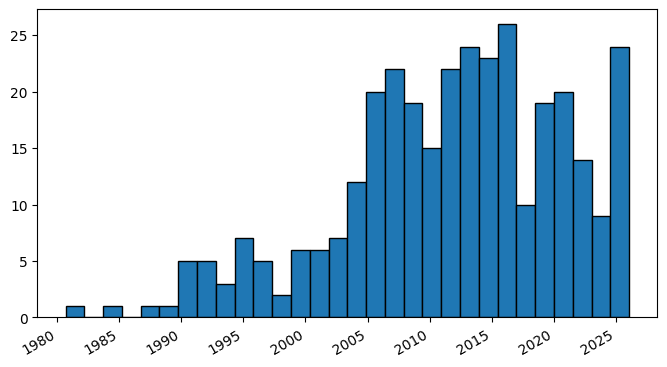

In [21]:
fig, ax = plt.subplots()
plt.hist(dates, bins=30, edgecolor='black')
# set_size specifies the size of the graph
fig.set_size_inches(8, 4)
# Rotate and right-align the x labels so they don't crowd each other
for label in ax.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right')
plt.show()

### Frequency of Publication for an Author Search

In [22]:
params = {
    'db': 'pubmed',
    'term': 'Reed LK[au]',
    'retmode': 'json',
    'usehistory': 'y',
    'sort': 'pub date',
    'retmax': 500
}

response = requests.get(ESEARCH_URL, params=params)
data = response.json()
ids = data["esearchresult"]["idlist"]

# Print the number of results
len(ids)

110

In [23]:
pub_dates = []
for id in ids:
    params = {
        'db': 'pubmed',
        'id': id,
        'retmode': 'json'
    }
    try:
        response = requests.get(ESUMMARY_URL, params=params)
        sleep(.5)   # Add a delay between API calls
        response.raise_for_status() # Raise an error for bad responses
        data = response.json()
        pub_dates.append(data["result"][str(id)]["sortpubdate"][:10])
    except requests.exceptions.RequestException as e:
        print(f"An error occurred: {e}")
        data = None

In [24]:
dates = [datetime.strptime(date, '%Y/%m/%d') for date in pub_dates]
dates[:5]

[datetime.datetime(2026, 1, 1, 0, 0),
 datetime.datetime(2025, 11, 28, 0, 0),
 datetime.datetime(2025, 11, 1, 0, 0),
 datetime.datetime(2025, 10, 24, 0, 0),
 datetime.datetime(2025, 9, 24, 0, 0)]

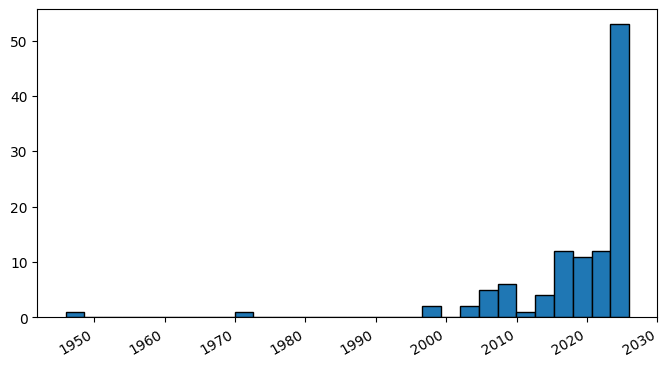

In [25]:
fig, ax = plt.subplots()
plt.hist(dates, bins=30, edgecolor='black')
fig.set_size_inches(8, 4)
for label in ax.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right')
plt.show()